In [6]:
import tensorflow as tf

# التحقق واش GPU موجود
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")


GPU is not available


In [7]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import losses 
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_size = (224, 224)

base_dirs = [
    "C:/Users/FUJITSU/Desktop/deep/flawers data/train"
]

X = []
y = []

for directory in base_dirs:
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                file_path = os.path.join(label_path, file)
                try:
                    img = load_img(file_path, target_size=img_size)
                    img_array = img_to_array(img) / 255.0  
                    X.append(img_array)
                    y.append(label)  
                except Exception as e:
                    print(f"Erreur avec {file_path}: {e}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert X to numpy array
X = np.array(X, dtype=np.float32)

# Convert labels to numpy array
y = np.array(y)

# Initialize and apply LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

MemoryError: Unable to allocate 369. MiB for an array with shape (642, 224, 224, 3) and data type float32

In [ ]:
# Get unique class labels
unique_labels = np.unique(y)
num_classes = len(unique_labels)

plt.figure(figsize=(15, 20))
num_images_per_class = 4

# Plot some sample images
for class_idx in unique_labels:
    # Get indices for this class
    indices = np.where(y == class_idx)[0][:num_images_per_class]
    
    for i, idx in enumerate(indices):
        plt.subplot(num_classes, num_images_per_class, class_idx * num_images_per_class + i + 1)
        plt.imshow(X[idx])
        plt.title(f'Class {class_idx}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (787, 224, 224, 3)
Test data shape: (197, 224, 224, 3)


# Arche 1 :

In [27]:
mon_model= Sequential([
Conv2D(filters=32,kernel_size=(6,6),strides=(2,2), activation="relu", input_shape=(224, 224, 3),padding='same'),

MaxPooling2D(pool_size=(5,5), strides=(1, 1)), # pool_size : Taille de la fenêtre de pooling (carré de 2x2 pixels). / strides: le pas de 1 
Conv2D(64,(5,5),(2,2), activation="relu"),
Conv2D(80,(4,4),(1,1), activation="relu"),
Conv2D(128,(3,3),(1,1), activation="relu"),
MaxPooling2D(pool_size=(2,2), strides=(1, 1)),
Conv2D(140,(2,2),(1,1), activation="relu"),
Flatten(), 
Dense(200,activation="relu"),
Dropout(0.3),
Dense(256, activation="relu"),
Dense(256, activation="relu"),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(14, activation='softmax')
])

# Resumen del modelo
mon_model.summary()

C:\Users\FUJITSU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 108, 108, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 49, 49, 80)     │        82,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 47, 47, 128)    │        92,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 45, 45, 140)    │        71,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 283500)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │    56,700,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 14)             │         1,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,155,522 (218.03 MB)

 Trainable params: 57,155,522 (218.03 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
##compilation

opt = tf.keras.optimizers.SGD(0.01)
optadam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


mon_model.compile(optimizer=opt,
              loss=losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [29]:
## fit
# Callbacks pour  ajuster le taux d'apprentisage  et eviter le surapprentissage avec early_stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = mon_model.fit(x_train, y_train, epochs=50, batch_size=28, validation_split=0.2, callbacks=[reduce_lr, early_stopping])


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.8260 - loss: 1.4469 - val_accuracy: 1.0000 - val_loss: 7.0407e-04 - learning_rate: 0.0100
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.4171e-04 - learning_rate: 0.0100
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.1772e-04 - learning_rate: 0.0100
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 1.0000 - loss: 8.4339e-04 - val_accuracy: 1.0000 - val_loss: 6.5337e-05 - learning_rate: 0.0100
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 1.0000 - loss: 3.4692e-04 - val_accuracy: 1.0000 - val_loss: 5.1302e-05 - learning_rate: 0.0100
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 1.0000 - loss: 2.3671e-04 - val_accuracy: 1.0000 - val_loss: 4.1091e-05 - learning_rate: 0.0100
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 1.

KeyboardInterrupt: 

In [ ]:
# Évaluer le modèle
test_loss, test_acc = mon_model.evaluate(x_test, y_test)
print('Accuracy sur l\'ensemble de test :', test_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.9048 - loss: 0.3198
Accuracy sur l'ensemble de test : 0.900355875492096


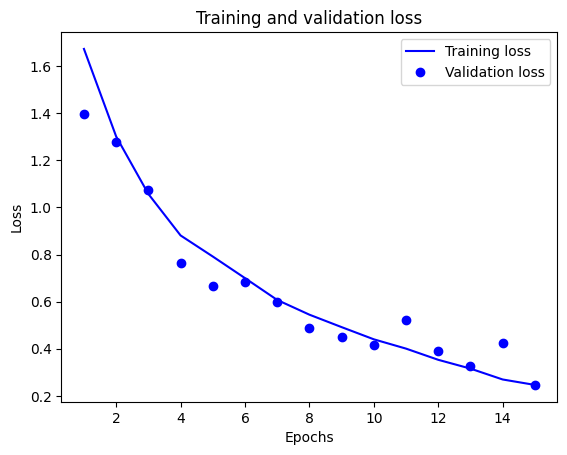

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

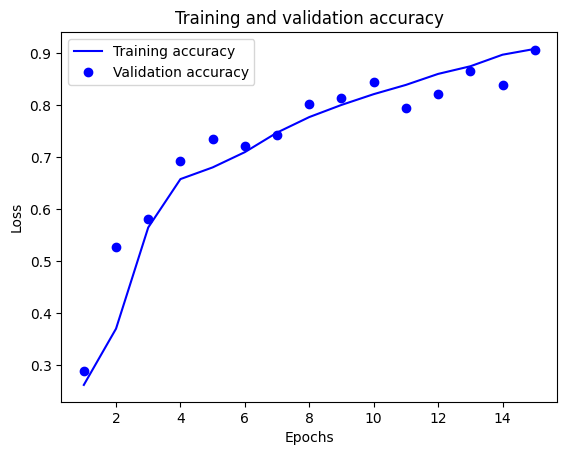

In [ ]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step
Predictions shape: (1405,)
Test labels shape: (1405,)
Predictions: [2 1 1 ... 1 1 1]
***** Confusion Matrix *****
[[315  22   4   7]
 [ 39 233  33  13]
 [  3   6 382   4]
 [  0   7   2 335]]


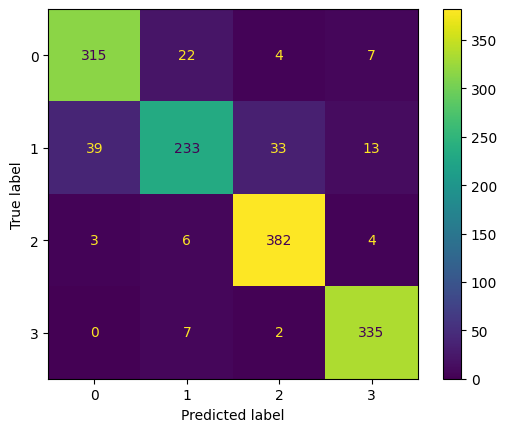

***** Precision *****
Macro-averaged precision: 0.8981


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# testing
# Generate predictions
predictions = mon_model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
print("Predictions shape:", y_pred.shape)
print("Test labels shape:", y_test.shape)
print("Predictions:", y_pred)

# Display confusion matrix
print("***** Confusion Matrix *****")
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate precision
print("***** Precision *****")
precision = precision_score(y_test, y_pred, average='macro')
print(f"Macro-averaged precision: {precision:.4f}")

In [ ]:
# Évaluer le modèle en training
train_loss, train_acc = mon_model.evaluate(x_train, y_train)
print('Accuracy sur l\'ensemble de train :', train_acc)

176/176 ━━━━━━━━━━━━━━━━━━━━ 33s 190ms/step - accuracy: 0.9456 - loss: 0.1672
Accuracy sur l'ensemble de train : 0.9371662735939026
